In [421]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import os, pickle, random
from sklearn.cluster import KMeans
from scipy.sparse import rand
import scipy
from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt

In [181]:
data = pickle.load(open( "stockdata4.pickle", "rb" ))
market = list(data.mean(axis=1))

In [591]:
roll = pd.DataFrame(columns=list(data))
for i in range(len(data)-31):
    roll.loc[i] = [np.nanmean([(1+y)**1 for y in list(data[x][i:i+30])]) for x in (list(data))]
roll.head()


,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,XLNX,XYL,YUM,ZBH,ZION,ZTS,TSLA,GLD,SLV,SPY
0,0.999865,1.000034,1.004796,0.997050,1.000642,0.997058,0.998847,0.992484,1.001704,1.004002,...,0.996261,1.000956,0.999118,0.998414,1.002193,1.001437,0.995057,0.998953,0.998943,1.000129
1,0.999537,0.999516,1.005155,0.996411,1.000456,0.996241,0.998482,0.993012,1.001159,1.004208,...,0.995977,1.000780,0.997920,0.997645,1.001307,1.000846,0.994743,0.999536,0.999108,0.999862
2,0.998901,0.999489,1.004672,0.996398,1.000030,0.995761,0.998069,0.993208,1.000005,1.002757,...,0.995551,0.999372,0.996975,0.998527,1.000643,1.000880,0.994003,0.999732,0.999434,0.999388
3,0.998513,0.998873,1.003972,0.995524,0.999453,0.995047,0.997277,0.992957,0.999943,1.001836,...,0.995125,0.999213,0.996301,0.998118,0.999263,1.000609,0.993105,1.000122,1.000158,0.998922
4,0.998217,0.998214,1.004245,0.996460,0.999803,0.994216,0.997099,0.991993,0.999861,1.001548,...,0.994705,0.998727,0.996574,0.998351,0.998643,1.001078,0.991729,1.000346,1.000880,0.998790


1185

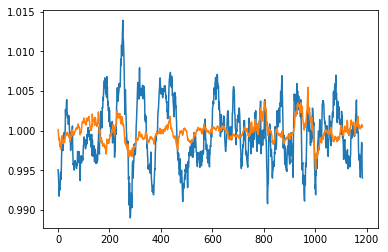

In [623]:
#lg = data.apply(lambda x: 1-(1+x)**3, axis=1)
#plt.plot(list(data['AAPL']))
plt.plot([x for x in list(roll['TSLA'])])
plt.plot([x for x in list(roll['SPY'])])
len(roll)

In [358]:
groups = 50

X = np.array([list(roll[col]) for col in list(roll)])
kmeans = KMeans(n_clusters=groups, random_state=1).fit(X)

labs = kmeans.labels_
tkrs = list(roll)
clusters = []
for i in range(groups):
    print('***',i,'***')
    cluster = []
    for j in range(len(labs)):
        if labs[j] == i:
            cluster.append(tkrs[j])
  #print(tkrs[j])
    print(cluster)
    clusters.append(cluster)

*** 0 ***
['AAPL', 'ADP', 'CDW', 'CTAS', 'CSCO', 'CTXS', 'CPRT', 'EXPD', 'FFIV', 'IT', 'HPQ', 'INTU', 'JNPR', 'MAR', 'NTAP', 'ORCL', 'PAYX']
*** 1 ***
['MMM', 'ALB', 'COG', 'CBS', 'CVX', 'GLW', 'DXC', 'XOM', 'BEN', 'GPC', 'LB', 'MAC', 'NLSN']
*** 2 ***
['ANET', 'WMB']
*** 3 ***
['CDNS', 'FLT', 'FTNT', 'GPN', 'MA', 'MCO', 'MSCI', 'PYPL', 'SPGI', 'SNPS', 'V']
*** 4 ***
['AES', 'DG', 'EXC', 'FE', 'PEG', 'SYY', 'WMT']
*** 5 ***
['HLT', 'KMI', 'OKE', 'TWTR']
*** 6 ***
['ATVI', 'ADBE', 'ANSS', 'BR', 'STZ', 'EA', 'GE', 'MSFT', 'NFLX', 'NVDA', 'CRM', 'TTWO']
*** 7 ***
['ARE', 'AIV', 'AVB', 'BXP', 'DRE', 'EQR', 'ESS', 'EXR', 'FRT', 'HCP', 'KIM', 'MAA', 'MNST', 'PLD', 'PSA', 'REG', 'SPG', 'SLG', 'UDR', 'VTR', 'VNO', 'WELL']
*** 8 ***
['APA', 'XEC', 'CXO', 'FANG', 'EOG', 'NBL', 'PXD']
*** 9 ***
['BHGE', 'HAL', 'HP', 'MYL', 'NOV', 'OXY', 'SLB']
*** 10 ***
['AAP', 'AMCR', 'ABC', 'HRB', 'CAH', 'CTL', 'CTVA', 'CVS', 'DRI', 'DVA', 'DOW', 'FOXA', 'FOX', 'IPG', 'KHC', 'LW', 'MCK', 'TAP', 'OMC', 'PRGO', 

In [595]:
rollKeep = roll.copy()

In [631]:
roll = rollKeep.copy()
roll = roll.drop(['DOW','FOXA','FOX','CTVA','LW','AMCR'], axis=1)

In [632]:
A = np.array(roll)
b = np.array([len(list(roll)) for i in range(len(A))])

In [633]:
print(len(A),len(A[0]))

1185 501


In [634]:
vals = np.array(scipy.optimize.nnls(A, b)[0])

In [635]:
weights = pd.DataFrame()
weights['Stock'] = list(roll)
weights['Weight'] = vals
weights = weights.sort_values(by='Weight',ascending=False)

weights = weights[weights['Weight'] > 0]
weights.head(len(weights))

,Stock,Weight
498,GLD,222.331702
176,ESS,32.530897
372,PNC,30.759877
178,EVRG,25.143278
427,TMUS,23.917871
73,HRB,23.884073
154,DLTR,16.374263
460,VLO,15.962626
279,KR,15.588005
367,PFE,14.519263


In [637]:
#roll['AMCR']

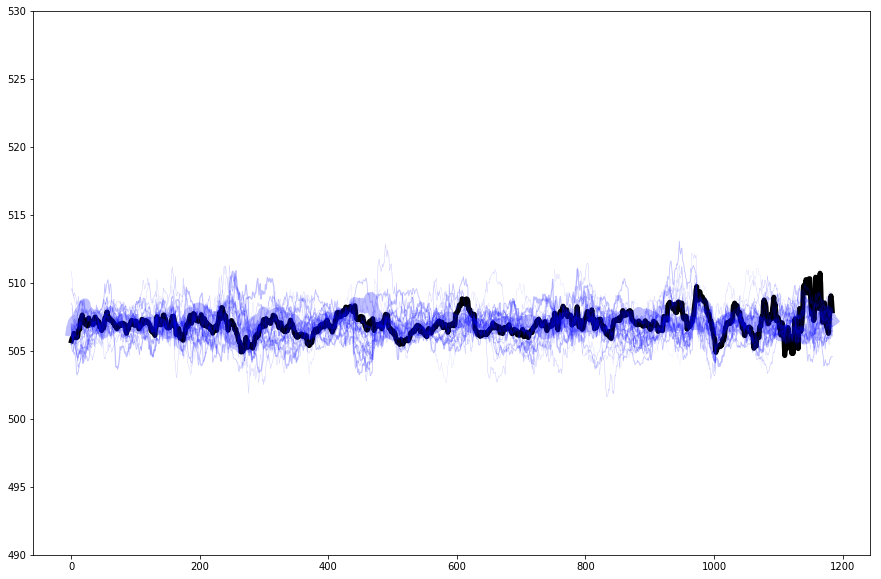

In [638]:
plt.figure(figsize=(15,10))
plt.plot(v,linewidth=5, linestyle="-",c='black')
plt.ylim(490,530)
k = 0
for s in np.array(list(weights['Stock'])):
    #print(vals[list(roll).index(s)])
    plt.plot([len(list(rollKeep))*x for x in roll[s]],linewidth=vals[list(roll).index(s)]/20,linestyle='-',alpha=.25,c='blue')
    k += 1

0.8456638472997926


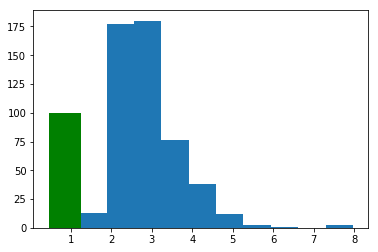

In [622]:
plt.hist([np.nanstd([len(rollKeep)*x for x in roll[y]]) for y in list(roll)])
plt.bar(np.nanstd(v),height = 100,color='green')
print(np.nanstd(v))

In [504]:
weights[weights['Stock']=='TSLA']

,Stock,Weight
502,TSLA,0.0
